# 常见绘图技巧
## 字体
matplotlib.rcParams[u'font.sans-serif'] = ['simhei]

matplotlib.rcParams['axes.unicode_minus'] = False

## 保存图片 
1. 图片格式:plt.savefig('直方图恐怖袭击和化学恐怖袭击',dpi = 600)
2. 保存图片和显示图片一致  plt.tight_layout() 

## 调整xy轴的其实值和结束值，避免数字装上周边线条
1. ax.set_ylim(0, max(y_est + y_err))#这里可以设置y轴柱子的初始高度和结束高度，特别是结束高度，可以直接自己设定一个值，来避免顶撞 
2. ax.set_xlim(0)#默认坐标从0开始

## 调整标题和下面的距离
1. ax.set_title("BreakDown of the economic impact of terrorism,2018",pad=30) #提升title和图片之间的距离

# 柱状图系列
## 单个柱
## 两个柱
## 横向柱


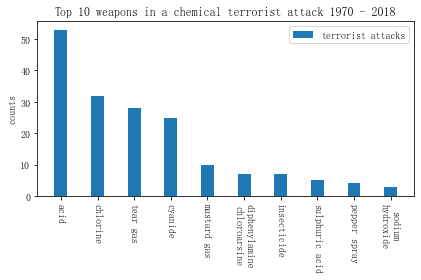

In [3]:
#单个柱子
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
mpl.rcParams[u'font.sans-serif'] = ['simhei]
mpl.rcParams['axes.unicode_minus'] = False
# 设定全局字体
mpl.rcParams.update({
    'font.family': 'sans-serif',
    #'font.sans-serif': ['Times New Roman'],
    'font.sans-serif': ['SimSun']
    })


labels = ['acid',
 'chlorine',
 'tear gas',
 'cyanide',
 'mustard gas',
 'diphenylamine\nchloroarsine',
 'insecticide',
 'sulphuric acid',
 'pepper spray',
 'sodium\nhydroxide']

counts= [53, 32, 28, 25, 10, 7, 7, 5, 4, 3]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, counts, width, label='terrorist attacks')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('counts')
#ax.set_xlabel("weaptype")
ax.set_title('前10')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


ax.legend(loc='upper right')
plt.xticks(rotation=270) #横坐标旋转排列
fig.tight_layout()
plt.savefig('直方图化学武器的具体出现次数.png',dpi = 600)
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10]


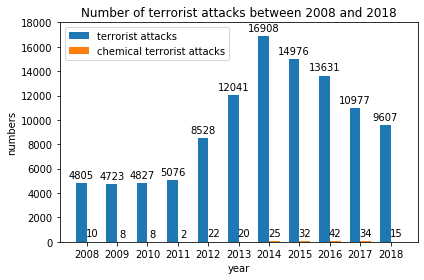

In [29]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = list(range(2008, 2019))
alltype = [4805, 4723, 4827, 5076, 8528, 12041, 16908, 14976, 13631, 10977, 9607]
chetype = [10, 8, 8, 2, 22, 20, 25, 32, 42, 34, 15]

x = np.arange(len(labels))  # the label locations
print(x)
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, alltype, width,label='terrorist attacks')
rects2 = ax.bar(x + width/2, chetype, width,label='chemical terrorist attacks')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('numbers')
ax.set_xlabel("year")
ax.set_title('Number of terrorist attacks between 2008 and 2018')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
ax.legend(loc='upper left')
fig.tight_layout()
ax.set_ylim(0,18000)
plt.savefig('直方图恐怖袭击和化学恐怖袭击',dpi = 600)
plt.show()

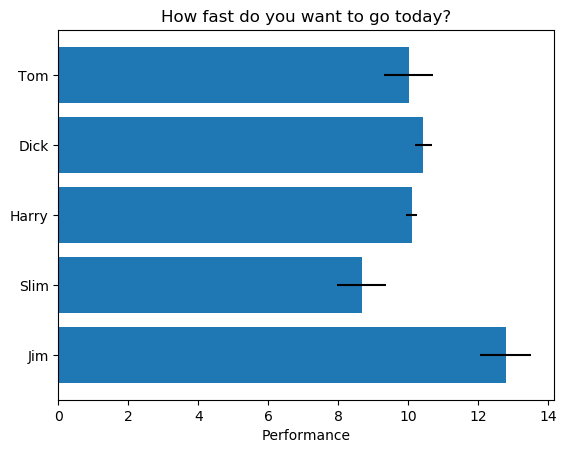

In [3]:
#横向柱简化版
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

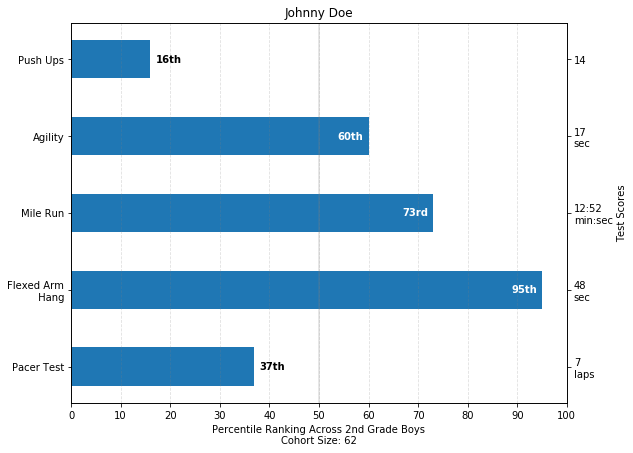

In [2]:
# 横向柱美化版
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

np.random.seed(42)

Student = namedtuple('Student', ['name', 'grade', 'gender'])# 创建一个Student的类，包含三个属性
Score = namedtuple('Score', ['score', 'percentile'])
#Counts = 
# GLOBAL CONSTANTS 变成一个兹字典
test_names = ['Pacer Test', 'Flexed Arm\n Hang', 'Mile Run', 'Agility',
              'Push Ups']
test_meta = dict(zip(test_names, ['laps', 'sec', 'min:sec', 'sec', '']))# 组合成5个元组


def attach_ordinal(num):
    """Convert an integer to an ordinal string, e.g. 2 -> '2nd'."""
    suffixes = {str(i): v
                for i, v in enumerate(['th', 'st', 'nd', 'rd', 'th',
                                       'th', 'th', 'th', 'th', 'th'])}

    v = str(num)
    # special case early teens
    if v in {'11', '12', '13'}:
        return v + 'th'
    return v + suffixes[v[-1]]


def format_score(scr, test):
    """
    Build up the score labels for the right Y-axis by first
    appending a carriage return to each string and then tacking on
    the appropriate meta information (i.e., 'laps' vs. 'seconds'). We
    want the labels centered on the ticks, so if there is no meta
    info (like for pushups) then don't add the carriage return to
    the string
    """
    md = test_meta[test]
    if md:
        return '{0}\n{1}'.format(scr, md)
    else:
        return scr


def format_ycursor(y):
    y = int(y)
    if y < 0 or y >= len(test_names):
        return ''
    else:
        return test_names[y]


def plot_student_results(student, scores, cohort_size):
    #  create the figure
    fig, ax1 = plt.subplots(figsize=(9, 7)) #画多张图  等价于fig, ax = plt.subplots(11)
    fig.subplots_adjust(left=0.115, right=0.88)
    fig.canvas.set_window_title('Eldorado K-8 Fitness Chart')

    pos = np.arange(len(test_names)) #生成5个随机数

    rects = ax1.barh(pos, [scores[k].percentile for k in test_names],
                     align='center',
                     height=0.5,
                     tick_label=test_names)

    ax1.set_title(student.name) #可以理解

    ax1.set_xlim([0, 100])
    ax1.xaxis.set_major_locator(MaxNLocator(11))
    ax1.xaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.25)

    # Plot a solid vertical gridline to highlight the median position
    ax1.axvline(50, color='grey', alpha=0.25)

    # Set the right-hand Y-axis ticks and labels
    ax2 = ax1.twinx()

    scoreLabels = [format_score(scores[k].score, k) for k in test_names]

    # set the tick locations
    ax2.set_yticks(pos)
    # make sure that the limits are set equally on both yaxis so the
    # ticks line up
    ax2.set_ylim(ax1.get_ylim())

    # set the tick labels
    ax2.set_yticklabels(scoreLabels)

    ax2.set_ylabel('Test Scores')

    xlabel = ('Percentile Ranking Across {grade} Grade {gender}s\n'
              'Cohort Size: {cohort_size}')
    ax1.set_xlabel(xlabel.format(grade=attach_ordinal(student.grade),
                                 gender=student.gender.title(),
                                 cohort_size=cohort_size))

    rect_labels = []
    # Lastly, write in the ranking inside each bar to aid in interpretation
    for rect in rects:
        # Rectangle widths are already integer-valued but are floating
        # type, so it helps to remove the trailing decimal point and 0 by
        # converting width to int type
        width = int(rect.get_width())

        rankStr = attach_ordinal(width)
        # The bars aren't wide enough to print the ranking inside
        if width < 40:
            # Shift the text to the right side of the right edge
            xloc = 5
            # Black against white background
            clr = 'black'
            align = 'left'
        else:
            # Shift the text to the left side of the right edge
            xloc = -5
            # White on magenta
            clr = 'white'
            align = 'right'

        # Center the text vertically in the bar
        yloc = rect.get_y() + rect.get_height() / 2
        label = ax1.annotate(rankStr, xy=(width, yloc), xytext=(xloc, 0),
                            textcoords="offset points",
                            ha=align, va='center',
                            color=clr, weight='bold', clip_on=True)
        rect_labels.append(label)

    # make the interactive mouse over give the bar title
    ax2.fmt_ydata = format_ycursor
    # return all of the artists created
    return {'fig': fig,
            'ax': ax1,
            'ax_right': ax2,
            'bars': rects,
            'perc_labels': rect_labels}

#test_names = ['Pacer Test', 'Flexed Arm\n Hang', 'Mile Run', 'Agility','Push Ups']
#Score = namedtuple('Score', ['score', 'percentile'])
student = Student('Johnny Doe', 2, 'boy') #Student = namedtuple('Student', ['name', 'grade', 'gender']) 
scores = dict(zip(                        
    test_names,                            
    (Score(v, p) for v, p in
     zip(['7', '48', '12:52', '17', '14'],
         np.round(np.random.uniform(0, 100, len(test_names)), 0)))))
# uniform均匀分布(start,end ,values_count)
# np.round() 对数字四舍五入处理
#[('7', 73.0), ('48', 21.0), ('12:52', 41.0), ('17', 78.0), ('14', 53.0)] zip最里面的结果
#Score(score='7', percentile=51.0),
#'Pacer Test': Score(score='7', percentile=62.0),  dict结果  
cohort_size = 62  # The number of other 2nd grade boys

arts = plot_student_results(student, scores, cohort_size)
plt.show()

# 画柱状图常见的问题
## 画图和柱子上面的数字顶上了
1.ax.set_ylim(0, max(y_est + y_err))#这里可以设置y轴柱子的初始高度和结束高度，特别是结束高度，可以直接自己设定一个值，来避免顶撞
2.ax.set_xlim(0)#默认坐标从0开始

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 6.41818182  7.30181818  8.18545455  9.06909091  9.95272727 10.83636364
 11.72       12.60363636 13.48727273 14.37090909 15.25454545]


(0, 17.038310624577136)

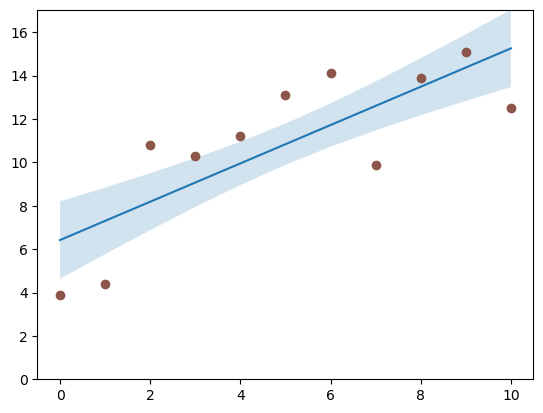

In [27]:
# sphinx_gallery_thumbnail_number = 2

N = 21
x = np.linspace(0, 10, 11) 
y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]
print(x)
# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b # 一个list
y_err = x.std() * np.sqrt(1/len(x) +(x - x.mean())**2 / np.sum((x - x.mean())**2)) # 一个list
print(y_est)
fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
#画线
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
#x：代表x轴的值
#  ：代表填充的下值
#  ：填充的上值
#alpha=0.2 会让填充颜色变得透明一些。
ax.plot(x, y, 'o', color='tab:brown')
ax.set_ylim(0, max(y_est + y_err))#默认坐标从0开始
#ax.set_xlim(0)#默认坐标从0开始
#画点

In [1]:
import numpy as np
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(1,2,1,polar=True) #设置第一个坐标轴为极坐标体系
ax2=fig.add_subplot(1,2,2,polar=True) #设置第二个坐标轴为极坐标体系
fig.subplots_adjust(wspace=0.4) #设置子图间的间距，为子图宽度的40%

p1={"编程能力":60,"沟通技能":70,"专业知识":65,"团体协作":75,"工具掌握":80} #创建第一个人的数据
p2={"编程能力":70,"沟通技能":60,"专业知识":75,"团体协作":65,"工具掌握":70} #创建第二个人的数据

data1=np.array([i for i in p1.values()]).astype(int) #提取第一个人的信息
data2=np.array([i for i in p2.values()]).astype(int) #提取第二个人的信息
label=np.array([j for j in p1.keys()]) #提取标签

angle = np.linspace(0, 2*np.pi, len(data1), endpoint=False) #data里有几个数据，就把整圆360°分成几份
angles = np.concatenate((angle, [angle[0]])) #增加第一个angle到所有angle里，以实现闭合
data1 = np.concatenate((data1, [data1[0]])) #增加第一个人的第一个data到第一个人所有的data里，以实现闭合
data2 = np.concatenate((data2, [data2[0]])) #增加第二个人的第一个data到第二个人所有的data里，以实现闭合

#设置第一个坐标轴
ax1.set_thetagrids(angles*180/np.pi, label, fontproperties="Microsoft Yahei") #设置网格标签
ax1.plot(angles,data1,"o-")
ax1.set_theta_zero_location('NW') #设置极坐标0°位置
ax1.set_rlim(0,100) #设置显示的极径范围
ax1.fill(angles,data1,facecolor='g', alpha=0.2) #填充颜色
ax1.set_rlabel_position('255') #设置极径标签位置
ax1.set_title("路人甲",fontproperties="SimHei",fontsize=16) #设置标题

#设置第二个坐标轴
ax2.set_thetagrids(angles*180/np.pi, label, fontproperties="Microsoft Yahei") #设置网格标签
ax2.plot(angles,data2,"o-")
ax2.set_theta_zero_location('NW') #设置极坐标0°位置
ax2.set_rlim(0,100) #设置显示的极径范围
ax2.fill(angles,data2,facecolor='g', alpha=0.2) #填充颜色
ax2.set_rlabel_position('255') #设置极径标签位置
ax2.set_title("路人乙",fontproperties="SimHei",fontsize=16) #设置标题

plt.show()

TypeError: ufunc 'deg2rad' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

findfont: Font family ['Microsoft Yahei'] not found. Falling back to DejaVu Sans.
/root/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 32534 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 31243 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 33021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 27807 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/lib/python3.7/site-pac

TypeError: ufunc 'deg2rad' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

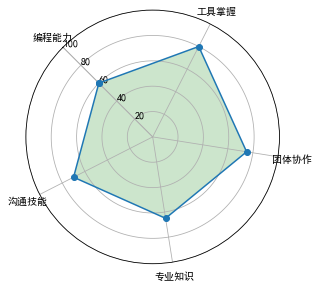

In [2]:
import numpy as np
from matplotlib import pyplot as plt
matplotlib.rcParams[u'font.sans-serif'] = ['simhei']
matplotlib.rcParams['axes.unicode_minus'] = False
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(1,2,1,polar=True) #设置第一个坐标轴为极坐标体系

p1={"编程能力":60,"沟通技能":70,"专业知识":65,"团体协作":75,"工具掌握":80} #创建第一个人的数据
p2={"编程能力":70,"沟通技能":60,"专业知识":75,"团体协作":65,"工具掌握":70} #创建第二个人的数据

data1=np.array([i for i in p1.values()]).astype(int) #提取第一个人的信息
data2=np.array([i for i in p2.values()]).astype(int) #提取第二个人的信息
label=np.array([j for j in p1.keys()]) #提取标签

angle = np.linspace(0, 2*np.pi, len(data1), endpoint=False) #data里有几个数据，就把整圆360°分成几份
angles = np.concatenate((angle, [angle[0]])) #增加第一个angle到所有angle里，以实现闭合
data1 = np.concatenate((data1, [data1[0]])) #增加第一个人的第一个data到第一个人所有的data里，以实现闭合
data2 = np.concatenate((data2, [data2[0]])) #增加第二个人的第一个data到第二个人所有的data里，以实现闭合

#设置第一个坐标轴
ax1.set_thetagrids(angles*180/np.pi, label) #设置网格标签
ax1.plot(angles,data1,"o-")
ax1.set_theta_zero_location('NW') #设置极坐标0°位置
ax1.set_rlim(0,100) #设置显示的极径范围
ax1.fill(angles,data1,facecolor='g', alpha=0.2) #填充颜色
ax1.set_rlabel_position('250') #设置极径标签位置

ax1.plot(angles,data2,"o-")
ax1.set_theta_zero_location('NW') #设置极坐标0°位置
ax1.set_rlim(0,100) #设置显示的极径范围
ax1.fill(angles,data2,facecolor='g', alpha=0.2) #填充颜色
ax1.set_rlabel_position('255') #设置极径标签位置

plt.show()

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


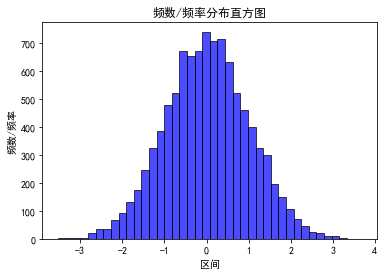

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline

# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['simhei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
# 随机生成（10000,）服从正态分布的数据
data = np.random.randn(10000)
"""
绘制直方图
data:必选参数，绘图数据
bins:直方图的长条形数目，可选项，默认为10
normed:是否将得到的直方图向量归一化，可选项，默认为0，代表不归一化，显示频数。normed=1，表示归一化，显示频率。
facecolor:长条形的颜色
edgecolor:长条形边框的颜色
alpha:透明度
"""
plt.hist(data, bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("区间")
# 显示纵轴标签
plt.ylabel("频数/频率")
# 显示图标题
plt.title("频数/频率分布直方图")
plt.show()


In [4]:
import matplotlib  
matplotlib.matplotlib_fname() 

'/root/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'

In [5]:
from matplotlib.font_manager import _rebuild

_rebuild() #reload一下

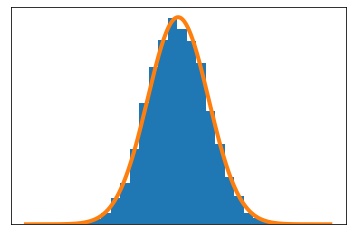

In [3]:
import matplotlib.pyplot as plt
import numpy as np


random_state = np.random.RandomState(19680801)
X = random_state.randn(10000)

fig, ax = plt.subplots()
ax.hist(X, bins=25, density=True)
x = np.linspace(-5, 5, 1000)
ax.plot(x, 1 / np.sqrt(2*np.pi) * np.exp(-(x**2)/2), linewidth=4)
ax.set_xticks([])
ax.set_yticks([])
#fig.savefig("histogram_frontpage.png", dpi=25)

TabError: inconsistent use of tabs and spaces in indentation (<ipython-input-3-5caae5006888>, line 9)

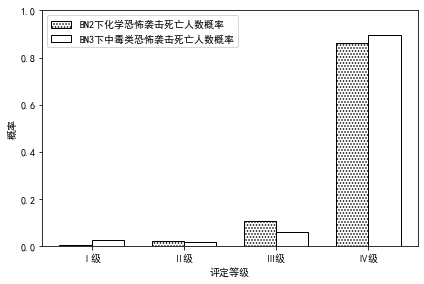

In [59]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rcParams['font.family']='simhei'

labels = ["Ⅰ级","Ⅱ级","Ⅲ级","Ⅳ级"]
ckill = np.array([0.0046, 0.0238, 0.1080, 0.8636])
chetype = np.array([0.0261, 0.0187, 0.0602, 0.8949])

x = np.array([0,1,2,3])  # the label locations
width = 0.35  # the width of the bars

fig,ax = plt.subplots()
rects1 = ax.bar(x - width/2, ckill, width, color='w',edgecolor="k",hatch="....",label='BN2下化学恐怖袭击死亡人数概率')
rects2 = ax.bar(x + width/2, chetype, width, color='w',edgecolor="k",hatch="",label ='BN3下中毒类恐怖袭击死亡人数概率')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('概率')
ax.set_xlabel("评定等级")
#ax.set_title('',y=-0.3)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


ax.legend(loc='upper left')
fig.tight_layout()
ax.set_ylim(0,1)
plt.savefig('直方图恐怖袭击和化学恐怖袭击',dpi = 600)
plt.show()